In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../data/experimental_validation/de_novo_v027_cleaned.csv')
df.columns = ['Compound', 'Condition', 'Replicate', 'Concentration', 'Value']
oddf = df[['SA' in x for x in list(df['Condition'])]]

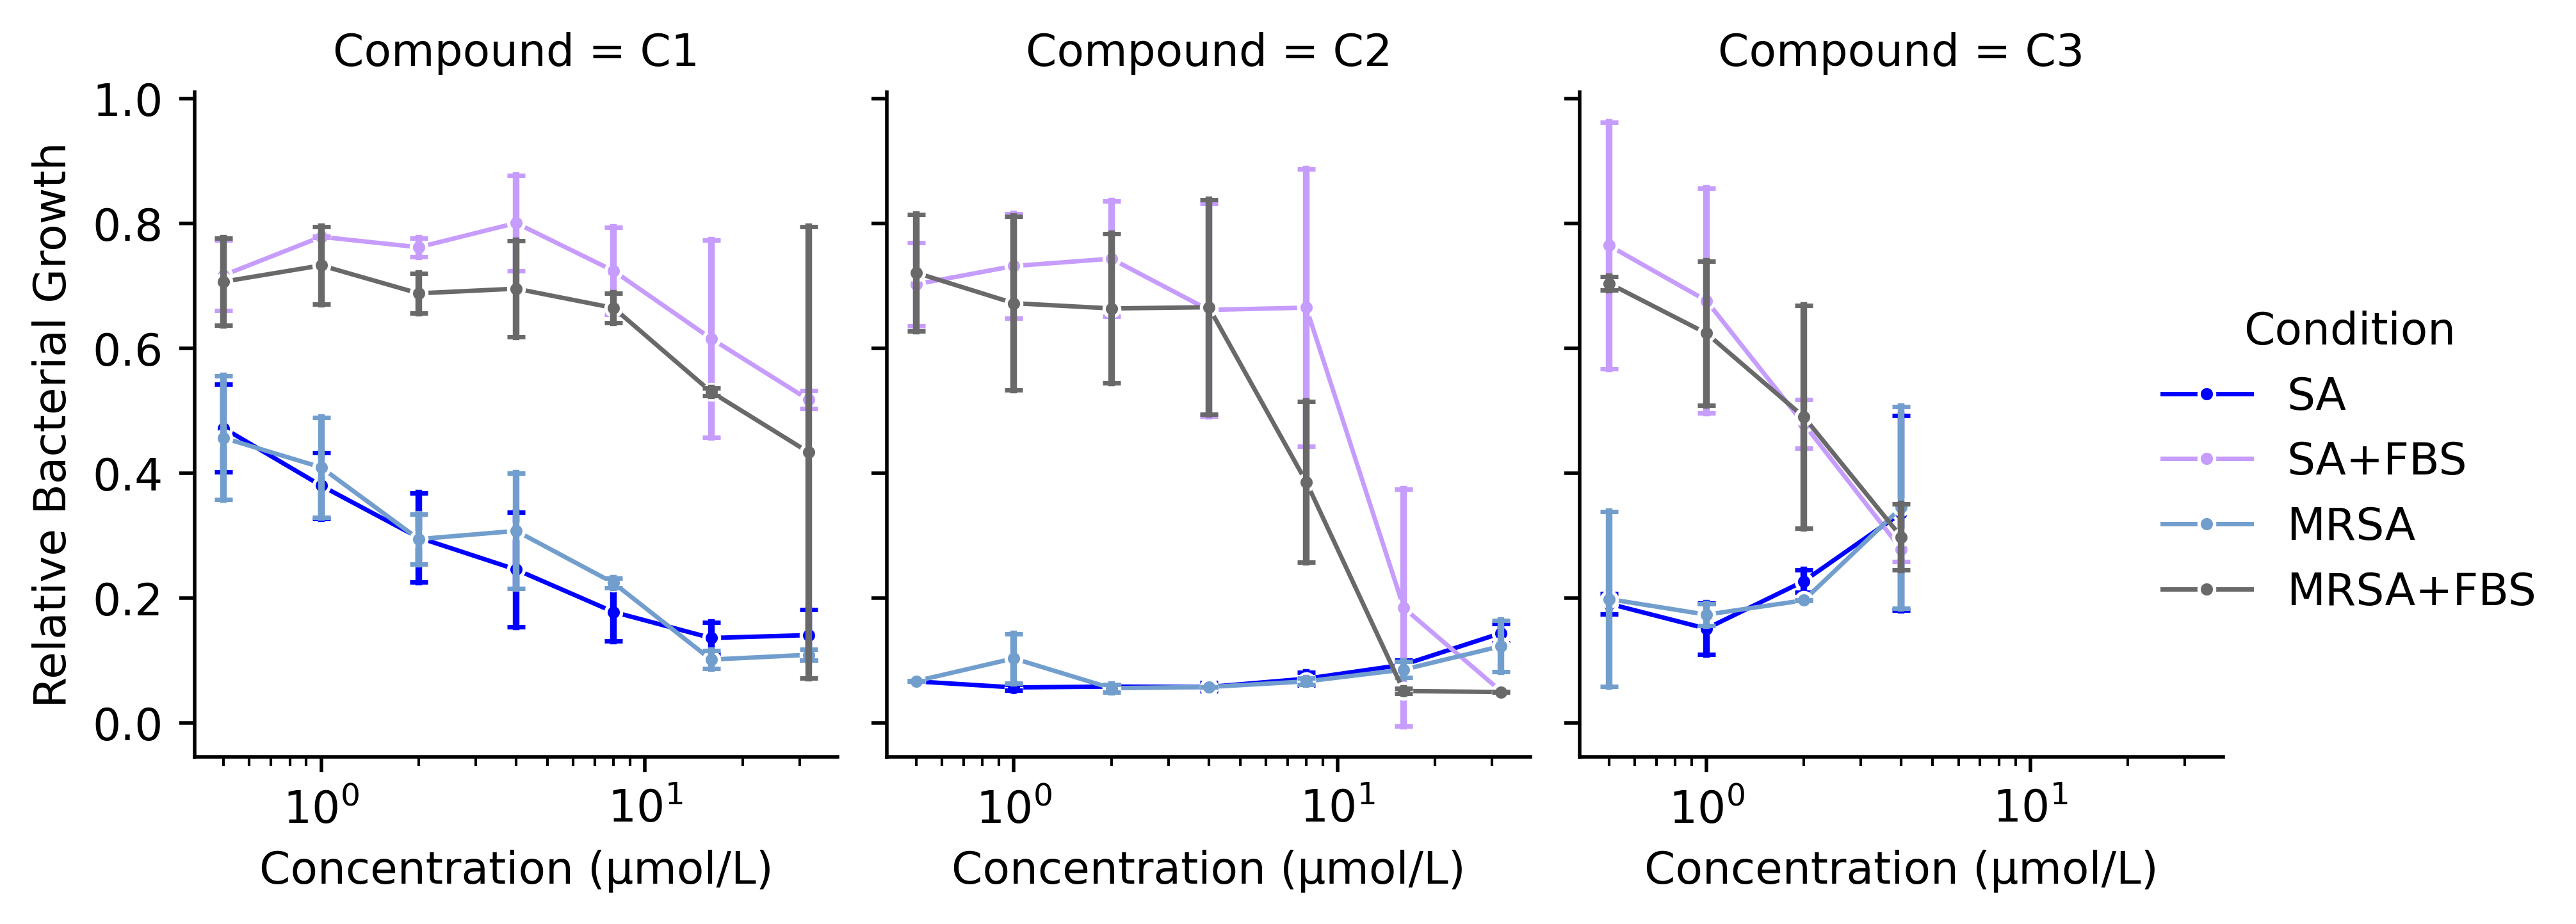

In [8]:
colors = sns.color_palette(['blue', '#c69cfd', '#729ece', 'dimgrey'])  # Shades of blues, light purple, and greys

# Plotting the data
g = sns.FacetGrid(oddf, col="Compound", hue="Condition", col_wrap=3, palette=colors)
g.map(sns.lineplot, "Concentration", "Value", marker = '.', markersize = 7, linewidth = 1, err_style = 'bars', errorbar = 'sd', err_kws = {'capsize':2})
g.set(xscale='log')
g.set_axis_labels("Concentration (\u03BCmol/L)", "Relative Bacterial Growth")
g.add_legend()
plt.gcf().set_size_inches(8, 3)  # Set the figure size (x inches wide by y inches high)
plt.gcf().dpi = 500  # Set the resolution (dots per inch)

# # Add error bars
# for ax, comp in zip(g.axes.flat, df['Compound'].unique()):
#     for condition in oddf['Condition'].unique():
#         cond_data = oddf[(oddf['Compound'] == comp) & (oddf['Condition'] == condition)]
#         color = colors[df['Condition'].unique().tolist().index(condition)]
#         ax.errorbar(cond_data['Concentration'], cond_data['Value'], yerr=np.std(cond_data['Value']), fmt='none', color=color, linewidth = 1, capsize=2)

# Show the plot
plt.savefig('../figure_panels/potency_of_v027_de_novo_cpds.png')
plt.savefig('../figure_panels/potency_of_v027_de_novo_cpds.png')
plt.show()